# SyriaTel Company


### Business Understanding

SyriaTel is a communication company that deals with Call-related services calls and messaging services. The company is realising revenue loss due to custmers churn. there are various reasons why customers would terminate the their business woth SeriaTel; among them are quality of services provided and the cost of call or messeges etc. To understand the root cause of the customer churn, it is important to develop a model that will predict potential customer churn, thus identifying the factors that increase the rate of customers's customers churn. This will help company take necesary actions to reduce churn.

### Project Objective

The primary objective is to develop a robust predictive model to identify customers at risk of churning from SyriaTel, our telecommunications company. By understanding and predicting customer churn, we aim to minimize revenue loss and proactively implement retention strategies.
#### Key Questions 
1.	What are the primary factors influencing customer churn?
2.	Are there specific patterns in usage or billing that precede a customer's decision to leave?
3.	Can customer service interactions serve as early indicators of dissatisfaction?

#### Scope
The scope of this project encompasses the analysis of historical customer data to identify patterns and indicators associated with churn. The focus is on developing a binary classification model that can effectively distinguish between customers likely to churn and those likely to stay.


#### Key Stakeholders
1.	Telecommunication Operations Team:  They are interested in reducing churn as it directly impacts revenue and customer satisfaction.
2.	Marketing Team: The marketing team can leverage insights from the model to design targeted campaigns aimed at retaining at-risk customers.
3.	Customer Service Team: Proactive identification of potential churners enables the customer service team to intervene and address issues promptly, enhancing customer satisfaction.

#### Data Sources 
Data sources include customer profiles, usage patterns, billing information, customer service interactions, contract details, and network performance metrics. The dataset should be representative of diverse customer segments and cover a sufficient historical period.

#### Key Questions
1.	What are the primary factors influencing customer churn?
2.	Are there specific patterns in usage or billing that precede a customer's decision to leave?
3.	Can customer service interactions serve as early indicators of dissatisfaction?


#### Success Criteria
The success of the project will be evaluated based on the model's predictive accuracy, precision, recall, and the ability to identify potential churners before they actually leave. The business impact will be measured by a reduction in churn rates and an increase in overall customer retention.

#### Risks 
Ethical Considerations: Ensuring the ethical use of customer data and compliance with privacy regulations is paramount.

#### Challenges
1.	Data Quality: Incomplete or inaccurate data may affect the model's performance.
2.	Changing Market Dynamics: Rapid changes in the telecom market may influence customer behavior, requiring the model to adapt.



### Data Understanding
##### importing libraries to load and interprete data

In [43]:
#importing the neccesary libraries for our analysis
import pandas as pd #
import numpy as np#
import matplotlib.pyplot as plt #
import seaborn as sns#
%matplotlib inline



# Sklearn libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel




import warnings
warnings.filterwarnings("ignore")

In [44]:
#Reading the data into a dataframe and previewing the first 5 rows just to see how our data looks like
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv') # using pandas to read the csv file containing the data
pd.set_option('display.max_columns', None)   # inbuilt function ensures that all our columns are displayed rather 
                                              # than just half version of it
df.head()# display of the first five rows of the data set

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Description of the Dataset 
#### Customer Profiles
Includes demographic information, subscription details, and customer identifiers.

#### Usage Patterns:
Data on call frequency, duration, data usage, and text messaging.

#### Billing Information:
Payment history, overdue payments, and spending patterns.

### Checking for Data Accuracy

In [45]:
print ("shape:", df.shape,'\n') # I'm looking at the shape of the data to understand the number of rows and columns 

print("Column infomation:\n",df.info()) # Checking the characteristic of and components of the DataFrame;  including the size, column names, data types, and the number
        # missin valuse , if present 

shape: (3333, 21) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls   

In [46]:
df.columns # displaying all the columns of the dataset

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [47]:
df.describe() # Performing central tendency operations: mean, mode and quartile for all columns with interger and float 
              # data types 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Dataset Description

Size and Structure:

* Number of Rows : 3333 entries, ranging from 0 to 3332. 

* Number of Columns: There are 21 columns in the DataFrame.

Column Information:

* Columns include various types of data, such as integers, floats, objects (likely strings), and a boolean (churn column).

* Some of the columns include: state, account length, area code, phone number, international plan, voice mail plan etc.



#### Distribution of Churn Customers in the dataset

In [48]:
# Calculating churn state_churn_rates

total_customers = len(df) # calculating the total number of customers in the dataset 
churned_customers = df['churn'].sum() # culcalting the total number of customer whose churn state is 'True'

churn_rate = churned_customers / total_customers # calculating the percetage of the 'True' customers 

print(f"Churn Rate: {churn_rate:.2%} : Indicating a potential revenue loss for the company at almost the same rate.")
                                      # dsplaying the result of our calculation


Churn Rate: 14.49% : Indicating a potential revenue loss for the company at almost the same rate.


In [49]:
df['churn'].value_counts() # counting the number of element in each category of 'True' and 'False' state of customer churn.
                           # True indicates that the custumer ended the their service with SyriaTel, 
                           # False shows that the customer is still present.

False    2850
True      483
Name: churn, dtype: int64

There is imbalance distibutiion of "True" and "False" statements in the dataset, 14.49% represnting True and False Taking up 85.51%

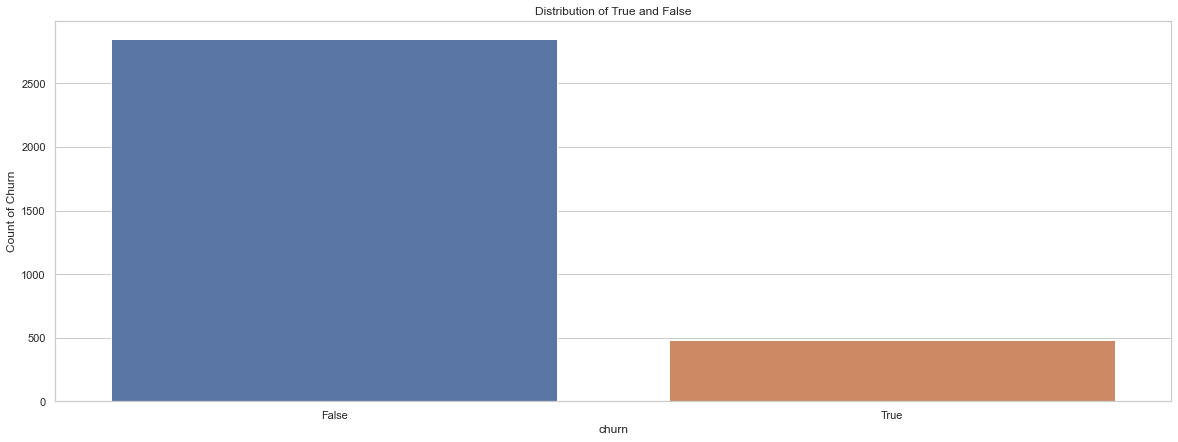

In [50]:
# ploting the disticnution of customers churn state
plt.figure(figsize=(20,7))
sns.set(style='whitegrid')
sns.countplot(df['churn'])
plt.title('Distribution of True and False')
plt.xlabel('churn')
plt.ylabel('Count of Churn')
plt.show()

### Exploratory Data Analysis

#### Missing Values:

In [51]:
Missing_val=df.isnull().sum().sort_values(ascending=False)#This determines how many missing values in each column then sum all the
                                                    # missing values in each column.
                                                    
Percent_Cal=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)#This arranges the values in descending order with 

Combined=pd.concat([Missing_val,Percent_Cal],axis=1,keys=['Missing_val','Percent_Cal'])#combining tatal and percentage into a new 
Combined

,Missing_val,Percent_Cal
churn,0,0.0
total day charge,0,0.0
account length,0,0.0
area code,0,0.0
phone number,0,0.0
international plan,0,0.0
voice mail plan,0,0.0
number vmail messages,0,0.0
total day minutes,0,0.0
total day calls,0,0.0


The the are no missing values in the dataset.

####  Outliers: 

In [52]:
def Outliers(df):
    df = df.select_dtypes(include=['int64', 'float64'])    # Selecting numerical columns
    for col in df.columns:                                  # iterating columns 
        data_mean, data_std = df[col].mean(), df[col].std()  # calculating mean and std
        cut_off = data_std * 3                               # defining a cut-off value as three times the standard deviation
        lower, upper = data_mean - cut_off, data_mean + cut_off  # calculating upper and lower bounds
        outliers = (df[col] < lower) | (df[col] > upper)        # creating Boolean mask to identify outlier
        df.loc[outliers, col] = df[col].median()   # replacing outlier with median value

    return df

Outliers(df).head()  # calling the function and displayng the first five rows.

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128.0,415.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,107.0,415.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,137.0,415.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,84.0,408.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,75.0,415.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0


#### Feature Engineering

#### 1. Categotical Data:

In [53]:
# Replace 'international plan' and 'voice mail plan' with binary values 
columns_to_encode = ['international plan', 'voice mail plan']

# replacing 'yes' and 'no' with 1 and 0 using a mapping
encoding_map = {
    'yes': 1,
    'no': 0,
}

# Applying the mapping to each column
df[columns_to_encode] = df[columns_to_encode].replace(encoding_map)


#### 2. Calculating Total Charges

In [54]:
# Calculating the total call charge in 24 hour time 

df['Total_Cost']=df['total day charge'] +df['total eve charge']+df['total night charge'] # calculating the cost of call in 24-hour
                                                                            # time and appending the column to the dataset
df.head() # displaying the first 5 rows 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total_Cost
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,72.86
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,55.54
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,59.00
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,65.02
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,49.36


### Analysis

#### 1. Distribution of churn across states 

State with the Highest Churn: CA (Churn Rate: 26.47%)
State with the Lowest Churn: HI (Churn Rate: 5.66%)


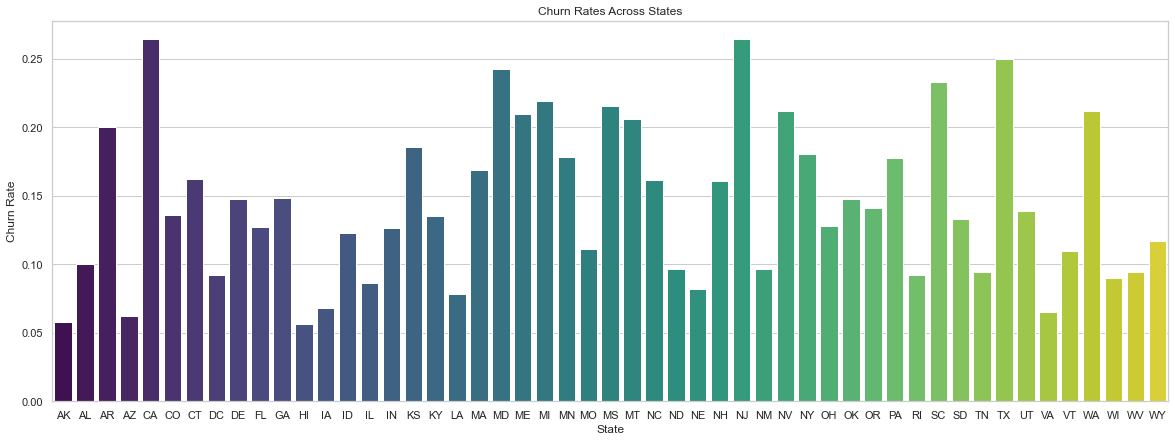

In [55]:
#Calculate churn rates for each state
state_churn_rates = df.groupby('state')['churn'].mean().reset_index()

# Find the state with the highest churn
state_highest_churn = state_churn_rates.loc[state_churn_rates['churn'].idxmax()]

# Find the state with the lowest churn
state_lowest_churn = state_churn_rates.loc[state_churn_rates['churn'].idxmin()]

print(f"State with the Highest Churn: {state_highest_churn['state']} (Churn Rate: {state_highest_churn['churn']:.2%})")
print(f"State with the Lowest Churn: {state_lowest_churn['state']} (Churn Rate: {state_lowest_churn['churn']:.2%})")

# Plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(20, 7))

# Create a bar plot
sns.barplot(x='state', y='churn', data=state_churn_rates, palette='viridis')

plt.title('Churn Rates Across States')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()

State with the Highest Churn: CA (Churn Rate: 26.47%), However, State with the Lowest Churn: HI (Churn Rate: 5.66%). A churn rate of 26% in as single state is great revenue loss. The cause of such high rate can be due to factors such as poor network connectivity, influence of competitors in the area etc.

#### 2. Multicorrelarity:

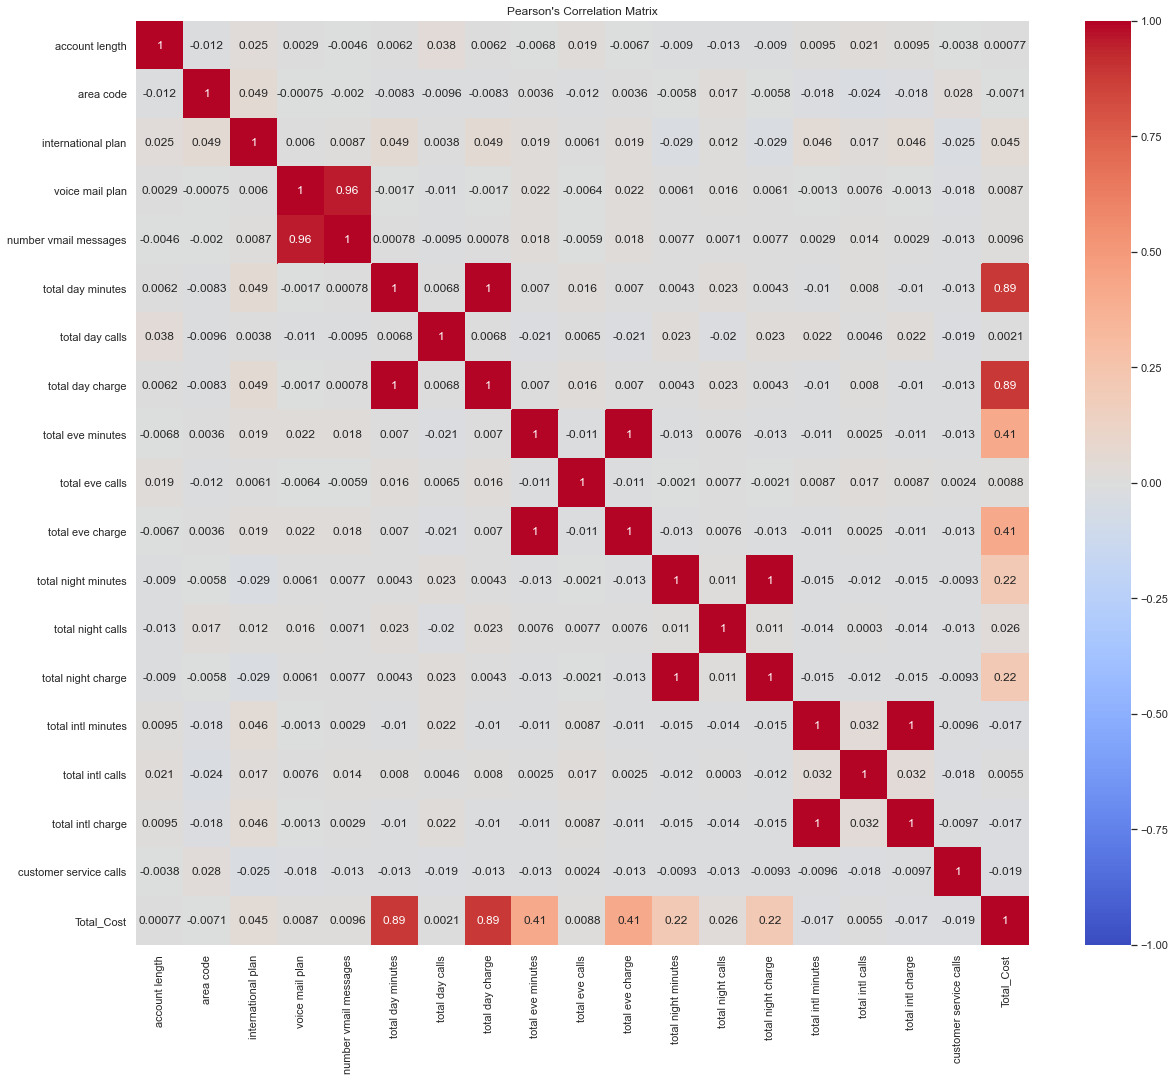

In [56]:
numeric_df = df.select_dtypes(include='number')

# Compute the Pearson correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn heatmap
plt.figure(figsize=(20, 17))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson's Correlation Matrix")
plt.show()

The following are the features with strong correlation:
* Voice mail plan and number of voice mail messages, 0.96, which is a trong positive correlation.
* Total_Cost and total day minutes, 0.89, which is a trong positive correlation. 
* Total_Cost and total day charge,.89,which is a trong positive correlation.

### 3. Relationship between churn and frequency of calls 

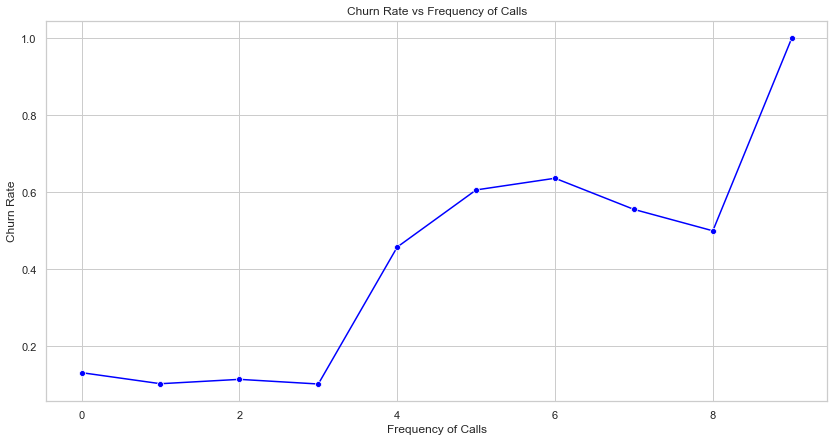

In [57]:
# Calculating the churn rate for each frequency of calls
churn_rate_by_calls = df.groupby('customer service calls')['churn'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='customer service calls', y='churn', data=churn_rate_by_calls, marker='o', color='blue')
plt.title('Churn Rate vs Frequency of Calls')
plt.xlabel('Frequency of Calls')
plt.ylabel('Churn Rate')
plt.show()

Churn rate increases with increase in the number of calls customers have with he custmer service. customers with average of 0-3 calls are less likely to churn as opposed to those who call 4 times and more.The rate increases sponteneosly when the frequency get above 8 times. There are several reasons for the increase; one would be the custmers problems were not solved despite making serveral attemps or question were not anwered. There is posibility that customes made several attempts reach custmer service and did not. Thus with more attempts, they resulted to churn. 

### 4. Relationship between International Plan and Churn

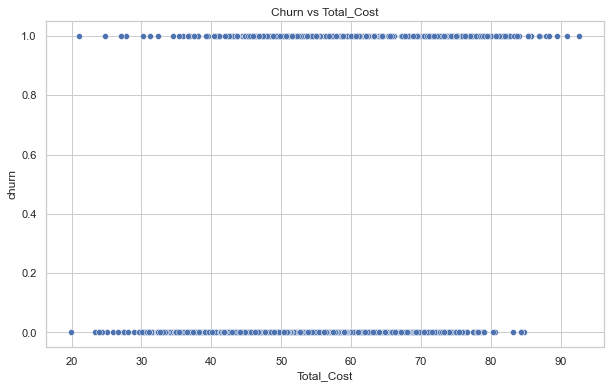

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Cost', y='churn', data=df, palette='viridis')
plt.title('Churn vs Total_Cost')
plt.xlabel('Total_Cost')
plt.ylabel('churn')
plt.show()

Customers are likely to churn when call charges between 35-85. 

### 5. Churn vs Place of Call/Area

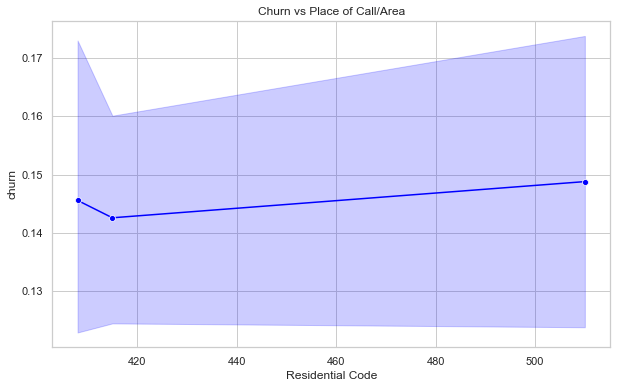

In [59]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='area code', y='churn', data=df, marker='o', color='blue')
# sns.scatterplot(x='churn', y='Total_Cost', data=df, palette='Set2')
plt.title('Churn vs Place of Call/Area')
plt.xlabel('Residential Code')
plt.ylabel('churn')
plt.show()

There is a weak relationship between place of residence/area code and churn rate but it is a faccter worth exploring

### Relatioship between Churn and Internatinal Plan

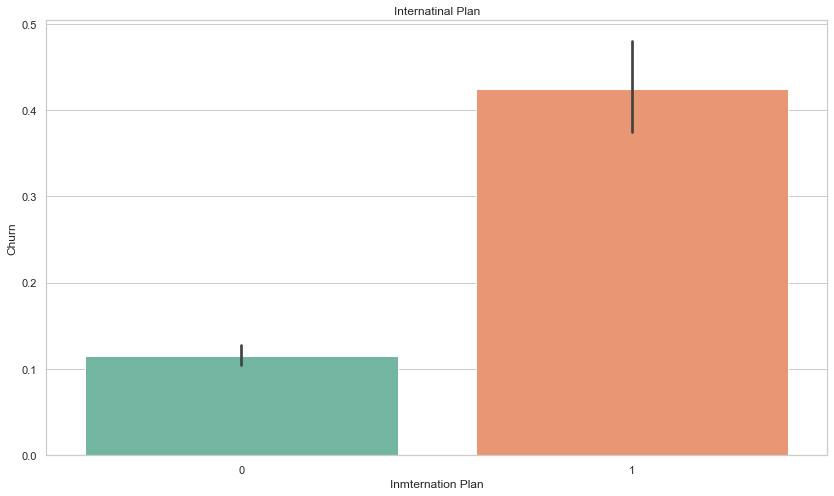

In [60]:
plt. figure (figsize=(14,8))
sns.barplot(x='international plan', y= 'churn', data= df,palette='Set2')
plt.title('Internatinal Plan')
plt.xlabel('Inmternation Plan')
plt.ylabel('Churn')
plt.show()

Customers who have an International plan are more likely to churn compared to those without any plan. This suggests that the presence of an International plan is associated with a higher likelihood of customer turnover or discontinuation of services. The reasons for this could vary, such as dissatisfaction with the International plan's offerings, higher costs associated with it, or other factors influencing customer preferences and decisions.

# Modeling


The objective of this stage is to identify and build models to predict likelyhood of a customer churning the company services. Thus helping SyriaTel Company to identify and mitigate the risk of churning.Insight for the dodels and analysis may help the  company create different trategies to ensure retation.

### Feature Selection
The following are the feature which have been selceted for modeling 
* area code 
* International plan
* voice mail plan
* number vmail messages
* total day minutes
* total day calls 
* total day charge 
* total eve minutes
* total eve calls
* total eve charge  
* total night minutes
* total night calls
* total night charge
* total intl minutes
* total intl calls
*. total intl charge
* customer service call
* Total_Cost

In [61]:
# Chosing x and y features

y= df['churn'] # this is the feature  that will be predictd
X= df.drop(['churn','state','account length','phone number'], axis=1) # chosing predictors for my model
   # "state " is dropped so that we state-code instead, since they are very related.
   # 'account length' and 'phone number' is dropped since is has no significance to churn

### Spliting Data Into Train and Test

In [62]:
# Conducting a split 
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

### Choosing the model

To start with, the model chosen is Logistic model, since output value (y) is binary. there is justficattion for logistic model other for trial purposes

#### Major Assumption of Logistic Regression Model
* The dependent variable is dichotomous. That is, it is either present or absent but never both at once. 
* There should exist no outliers in the data. 
* There should not be a high correlation or multicollinearity among the different predictors. This can be assessed using a correlation matrix among different predictors

In [63]:
# Instantiating the Logistic model
model= LogisticRegression()
# Fting the model
model. fit(X_train, y_train)

# Perfoming a predictin on the test data
y_pred= model. predict(X_test)

# pritng the model score

print ('score :', model.score(X_test, y_pred))

# printing model accuracy
print ('Accuracy :',accuracy_score(y_test,y_pred))

# performing  cross-tabulation 
pd.crosstab(y_test,y_pred)


score : 1.0
Accuracy : 0.8515742128935532


col_0,False,True
churn,,
False,563,3
True,96,5


The logistic model has shown good performance with an accuracy of 85% and a score of 100%. However, there are only 5 "True" statements out of a sample of 101, representing only 5%. One possible reason for this could be the undersampling of the "True" category. Another factor may be the presence of multicollinearity between predictors, such as the Voice mail plan and the number of voice mail messages, with a correlation of 0.96.

#### Evaluating The Logistic model using Cofusion Matrics

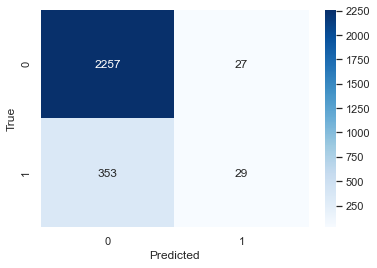

In [64]:
# Importing confusion matrix from Sklearn library
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = model.predict(X_train)

# Calculate confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Confusion Matrics as further shown that only 8% of "True" category has been classified correctly

In [65]:
# further insight from classification_report

y_train_pred= model.predict(X_train)
y_test_pred = model.predict(X_test)
print ("Logistic Regression Perfomance")
print ("Train Data \n",classification_report(y_train, y_train_pred))
print ("Test Data \n", classification_report(y_test, y_test_pred))

Logistic Regression Perfomance
Train Data 
               precision    recall  f1-score   support

       False       0.86      0.99      0.92      2284
        True       0.52      0.08      0.13       382

    accuracy                           0.86      2666
   macro avg       0.69      0.53      0.53      2666
weighted avg       0.82      0.86      0.81      2666

Test Data 
               precision    recall  f1-score   support

       False       0.85      0.99      0.92       566
        True       0.62      0.05      0.09       101

    accuracy                           0.85       667
   macro avg       0.74      0.52      0.51       667
weighted avg       0.82      0.85      0.79       667



Classification_report shows accuracy for train and test dataset have 86% and 85% respectively.However, there are   382 "True" element and 2284 "False" elements in the sample. "True" elements are under represnted.

### Handlind Sapmple Imbalance using SMOTE


In [66]:
# Importing counter from collection library to count the number of entrie in the sa
from collections import Counter

# Importing imbalance library fro sklearn
from imblearn.over_sampling import SMOTE

# instantiating smote

smote = SMOTE()

# fiting smote
X_train_somte, y_train_smote=smote. fit_resample(X_train.astype('float'),y_train)


# displying the number of element before introducing smote

print ('Before Smote:', Counter(y_train)) # 

# displying the number of element after introducing smote
print ('After Smote:', Counter(y_train_smote))

Before Smote: Counter({False: 2284, True: 382})
After Smote: Counter({False: 2284, True: 2284})


The number of False: 2284 and True: 2284 are now balanced 

### Evaluting the effect of Oversampling "True"

In [67]:
model.fit(X_train_somte, y_train_smote)
y_pred= model. predict(X_test)
print ('Accuracy :',accuracy_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

Accuracy : 0.712143928035982


col_0,False,True
churn,,
False,403,163
True,29,72


Accuracy  has reduced, 72%, on the other hand, samples the has been classified correctly as  "True" incresed from 5% to 72%

#### Evaluting Classification After SMOTE

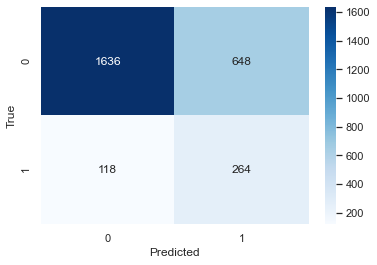

In [68]:
y_pred = model.predict(X_train)

# Calculate confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

sample size of True category has increased ; more element, espcially True category have classiffied correctly (70%). This is a great improvemetnt

### Introducing Other models:Forest Model, K-Nearest Neighbors ModelEmbedded Model and Decision Tree Model

In [69]:

# Creating fuctions to contain all the the modeles
def prepare_data():
    
    # Load dataset and preprocess it as needed
    # Preprocess and split the data into features (X) and target (y)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pass

# Logistic Regression Model
def logistic_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
    print("Logistic Regression Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# Random Forest Model
def random_forest_model(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
    print("Random Forest Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# Decision Tree Model
def decision_tree_model(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
    print("Decision Tree Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# K-Nearest Neighbors Model
def knn_model(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred))
    print("K-Nearest Neighbors Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# Embedded Model (using Random Forest for feature selection)
def embedded_model(X_train, y_train, X_test, y_test):
    model = Pipeline([
        ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
        ('classification', RandomForestClassifier(random_state=42))
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Embedded Model Accuracy:", accuracy_score(y_test, y_pred))
    print("Embedded Model Classification Report:")
    print(classification_report(y_test, y_pred))
    return model

# Example Usage
prepare_data()  # Call your data preparation function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model(X_train, y_train, X_test, y_test)
random_forest_model(X_train, y_train, X_test, y_test)
decision_tree_model(X_train, y_train, X_test, y_test)
knn_model(X_train, y_train, X_test, y_test)
embedded_model(X_train, y_train, X_test, y_test)

Logistic Regression Accuracy: 0.8515742128935532
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       566
        True       0.62      0.05      0.09       101

    accuracy                           0.85       667
   macro avg       0.74      0.52      0.51       667
weighted avg       0.82      0.85      0.79       667

Random Forest Accuracy: 0.974512743628186
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       566
        True       0.98      0.85      0.91       101

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667

Decision Tree Accuracy: 0.9355322338830585
Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.95      0

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=42))),
                ('classification', RandomForestClassifier(random_state=42))])

#### Models Intepretation 

Random Forest has the highet accuracy 97.45% followed by Decision Tree 93.55% and lastly is Logistic Regression 85.16%. Thus our best performed model is Random Forest.

### Model Evaluation 

 The main objective of this stage is to  assess our models. This is crucial for understanding the model's strengths and weaknesses. Additionally, it helps to determine which one is better suited for your specific problem. This is essential for making informed decisions about which model to deploy in a real-world scenario.

Logistic Regression Accuracy: 0.8515742128935532
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.99      0.92       566
        True       0.62      0.05      0.09       101

    accuracy                           0.85       667
   macro avg       0.74      0.52      0.51       667
weighted avg       0.82      0.85      0.79       667

Random Forest Accuracy: 0.974512743628186
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       566
        True       0.98      0.85      0.91       101

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667

Decision Tree Accuracy: 0.9355322338830585
Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.95      0

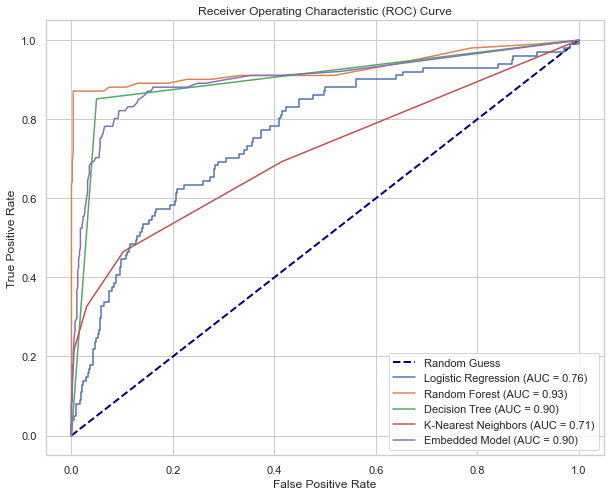

In [70]:
# Import nessary libraries 
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_auc(X_train, y_train, X_test, y_test, models):
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

    for model_name, model_function in models.items():
        # Train the model
        model = model_function(X_train, y_train, X_test, y_test)
        
        # Get the predicted probabilities for each class
        y_proba = model.predict_proba(X_test)
        
        # If binary classification, use label 1 probabilities
        if len(np.unique(y_train)) == 2:
            y_proba = y_proba[:, 1]
            y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
        else:
            # For multi-class classification, use one-vs-rest strategy
            y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
        
        # Calculate AUC
        auc_score = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Example Usage
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "Decision Tree": decision_tree_model,
    "K-Nearest Neighbors": knn_model,
    "Embedded Model": embedded_model
}

plot_roc_auc(X_train, y_train, X_test, y_test, models)


When considering the Area Under the Curve (AUC) as a metric, the Random Forest model stands out as the most effective, boasting an AUC of 0.93. Following closely are the Decision Tree and the Embedded Model, both with AUC values of 0.9. Notably, the K-Nearest Neighbors model performed the least well among the models evaluated.

Given these results, the Random Forest model appears to be the optimal choice for this dataset. Its high AUC indicates robust performance in distinguishing between classes, making it a reliable model for the given data.

### Hyperparameter Tuning

The goal of this stage if to find the best parameters for our models to ensuure optimal perfomance i.e reduce overfiting and underfiting

 ### NB.  GridSearchCV has been chosen as the tool for tuning the parameters

In [71]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# Logistic Regression Model
def logistic_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# Random Forest Model
def random_forest_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# Decision Tree Model
def decision_tree_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# K-Nearest Neighbors Model
def knn_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# Embedded Model (using Random Forest for feature selection)
def embedded_model_grid_search(X_train, y_train, X_test, y_test):
    param_grid = {'classification__n_estimators': [50, 100, 200], 'classification__max_depth': [None, 10, 20]}
    model = Pipeline([
        ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
        ('classification', RandomForestClassifier(random_state=42))
    ])
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_params, best_model, accuracy

# Compare models and parameters
models = {
    "Logistic Regression": logistic_model_grid_search,
    "Random Forest": random_forest_model_grid_search,
    "Decision Tree": decision_tree_model_grid_search,
    "K-Nearest Neighbors": knn_model_grid_search,
    "Embedded Model": embedded_model_grid_search
}

results = {'Model': [], 'Best Parameters': [], 'Accuracy': []}

for model_name, model_function in models.items():
    best_params, best_model, accuracy = model_function(X_train, y_train, X_test, y_test)
    
    results['Model'].append(model_name)
    results['Best Parameters'].append(best_params)
    results['Accuracy'].append(accuracy)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results)
print(comparison_df)

                 Model                                    Best Parameters  \
0  Logistic Regression                                       {'C': 0.001}   
1        Random Forest            {'max_depth': None, 'n_estimators': 50}   
2        Decision Tree         {'max_depth': 10, 'min_samples_split': 10}   
3  K-Nearest Neighbors          {'n_neighbors': 7, 'weights': 'distance'}   
4       Embedded Model  {'classification__max_depth': 10, 'classificat...   

   Accuracy  
0  0.850075  
1  0.974513  
2  0.962519  
3  0.881559  
4  0.919040  


The table provides information on different models along with their best parameters and corresponding accuracies:

Logistic Regression: Achieved an accuracy of 85.01% with the best parameter 'C' set to 0.001.

Random Forest: Emerged as the top-performing model with an accuracy of 97.45%, utilizing the following parameters:

max_depth: None
n_estimators: 50
Decision Tree: Showcased a strong performance with an accuracy of 96.25%, using parameters 'max_depth' of 10 and 'min_samples_split' of 10.

K-Nearest Neighbors: Achieved an accuracy of 88.16% with parameters 'n_neighbors' set to 7 and 'weights' as 'distance'.

Embedded Model: Demonstrated good performance with an accuracy of 91.90%, employing specific classification parameters.

In summary, the Random Forest model, with a remarkable accuracy of 97.45%, is considered the best-performing model. It was optimized with 'max_depth' set to None and 'n_estimators' at 50.

### Choosing the Model and the best Parameters 

In [72]:
# Creating a Random Forest model and inserting the paramters
best_rf_model = RandomForestClassifier(max_depth=None, n_estimators=50, random_state=42)

# Fiting the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the model
print("Random Forest (Tuned) Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))


Random Forest (Tuned) Accuracy: 0.974512743628186
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       566
        True       0.98      0.85      0.91       101

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667



Our tuned model has accuracy of 97,.45% on the test data. this is good.


### Selecting the Best Features for Prediction

Not all the features are of great significance to the model. Some increase random noise which lead to model overfitting. It is important to select the most important feature to optimize the model

                   Feature  Importance
17              Total_Cost    0.240862
16  customer service calls    0.133228
4        total day minutes    0.078819
1       international plan    0.076029
6         total day charge    0.070203
3    number vmail messages    0.048825
14        total intl calls    0.044611
13      total intl minutes    0.040428
15       total intl charge    0.039507
7        total eve minutes    0.035350
2          voice mail plan    0.033101
9         total eve charge    0.032534
10     total night minutes    0.025091
5          total day calls    0.024933
8          total eve calls    0.024224
11       total night calls    0.023830
12      total night charge    0.023232
0                area code    0.005193


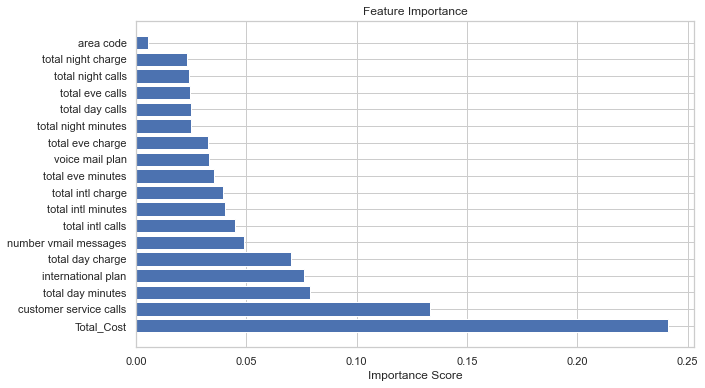

In [73]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to show feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance')
plt.show()

###Key Factors Impacting Churn:

1. Customer Service Calls: The frequency of customers reaching out to customer service, indicating concerns or seeking assistance.

2. nternational Plan: A binary value indicating whether a customer has an international call plan or not.

3. Total Cost: The cumulative cost of calls, calculated as the sum of day_charge, evening_charge, and night_charge, providing a 24-hour cost overview.

4. Total Day Minutes: The amount of time customers spend on calls in minutes.

5. Total Day Charge: The monetary expenditure incurred by users during daytime calls, potentially influenced by high per-minute rates, contributing to churn.

### Performing Prediction With Tuned Random Forest Model

In [74]:
# Creating a fuction to predict whether a customer will churn or not

from sklearn.ensemble import RandomForestClassifier

def predict_churn(total_day_charge, international_plan, customer_service_calls,
                  total_day_minutes, Total_Cost):
   
    # Selecting relevant features
    features = ['total day charge', 'international plan', 'customer service calls',
                'total day minutes', 'Total_Cost']

    # Creating a DataFrame with the provided values
    input_data = pd.DataFrame([[total_day_charge, international_plan, customer_service_calls,
                                total_day_minutes, Total_Cost]],
                              columns=features)

    # Initialize the RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Assuming 'df' is your original DataFrame
    X = df[features]
    y = df['churn']

    # Fit the model
    rf_classifier.fit(X, y)

    # Make predictions
    predictions = rf_classifier.predict(input_data)

    return predictions

# Example usage:
total_day_charge = 415
international_plan = 0  # 0 for No, 1 for Yes
customer_service_calls = 89
total_day_minutes = 200
Total_Cost = 70

result = predict_churn(total_day_charge, international_plan, customer_service_calls,
                        total_day_minutes, Total_Cost)

print(f'Churn Prediction: {result[0]}')


Churn Prediction: False


### Creating a Pickle to Store the Prediction Function 

In [75]:
import pickle

# Prediction Code

def predict_churn(total_day_charge, international_plan, customer_service_calls,
                  total_day_minutes, Total_Cost):
   
    # Selecting relevant features
    features = ['total day charge', 'international plan', 'customer service calls',
                'total day minutes', 'Total_Cost']

    # Creating a DataFrame with the provided values
    input_data = pd.DataFrame([[total_day_charge, international_plan, customer_service_calls,
                                total_day_minutes, Total_Cost]],
                              columns=features)

    # Initialize the RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Assuming 'df' is your original DataFrame
    X = df[features]
    y = df['churn']

    # Fit the model
    rf_classifier.fit(X, y)

    # Make predictions
    predictions = rf_classifier.predict(input_data)

    return predictions

# Example usage:
total_day_charge = 415
international_plan = 0  # 0 for No, 1 for Yes
customer_service_calls = 89
total_day_minutes = 200
Total_Cost = 70

result = predict_churn(total_day_charge, international_plan, customer_service_calls,
                        total_day_minutes, Total_Cost)

print(f'Churn Prediction: {result[0]}')

# Save the trained model to a file
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)


Churn Prediction: False


### Conclusion 

* The main factors affecting churn rate are charges of calls, International plan, frequency of customer service calls and total day minutes. 
* Call charges are expensive, especially during the day.
* Customer satisfaction is a contributor to customer churn. The more the customers call the customer service, the higher the churn. Either the customer service representatives did not resolve the customer's problems, or the customer care queue was too busy to handle customers' calls. Customers do not get to speak to the customer; they give up and churn.
* Probably, customers' experience and customer journey were not satisfactory.
* Customers with international plans are likely to Churn. There could be issues with the high cost of calls and poor connectivity among others

### Recommendation

Review Call Charges:

* Evaluate the pricing structure for calls, especially during the day, and consider revising it to make it more competitive and customer-friendly.
* Introduce promotions or packages that offer cost-effective calling plans, potentially reducing the incentive for customers to churn.

Enhance Customer Service Experience:

* Invest in customer service training to ensure representatives are well-equipped to address and resolve customer issues efficiently.
* Implement measures to reduce customer service wait times, such as increasing staff during peak hours or optimizing the customer care queue system.

Improve Communication with Customers:

* Enhance communication channels to keep customers informed about the status of their service requests, reducing frustration and the need for frequent customer service calls.
* Consider implementing automated systems to provide updates on common issues, allowing customers to get information without having to contact customer service.

Address International Plan Challenges:

* Investigate and address issues related to international plans, such as connectivity problems or unclear pricing structures.
* Provide additional benefits or incentives for customers with international plans to increase their satisfaction and loyalty.

Conduct Customer Satisfaction Surveys:

* Regularly gather feedback from customers to understand their experiences and identify areas for improvement.
* Use surveys to pinpoint specific pain points in the customer journey and take targeted actions to address them.

Implement Customer Retention Programs:

* Introduce loyalty programs or rewards for long-term customers to incentivize them to stay with the service.
* Offer personalized promotions or discounts based on customer usage patterns to enhance their overall experience.

Data Analysis for Proactive Measures:

* Continuously analyze customer data to identify early signs of dissatisfaction or patterns that may indicate potential churn.
* Implement proactive measures, such as reaching out to at-risk customers with targeted offers or support to prevent churn.